# Titanic Survival Prediction – Data Analysis & Machine Learning

## Problem Statement

The objective of this project is to analyze passenger data from the Titanic
to understand which factors influenced survival and to build a machine
learning model to predict survival outcomes.


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.metrics import accuracy_score, classification_report

In [8]:
%matplotlib inline

## Dataset Description

The dataset contains information about Titanic passengers including
age, gender, passenger class, fare, and survival status.


In [12]:
sns.set(style="whitegrid")

In [16]:
# Load your downloaded train file (use exact name)
train_df = pd.read_csv('train titanic - train vs code.csv')

In [17]:
print("Data loaded successfully!")
train_df.head()  # Show first 5 rows

Data loaded successfully!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
print("Shape:", train_df.shape)

Shape: (891, 12)


## Data Cleaning

The data is cleaned by handling missing values,
removing irrelevant columns, and preparing features
for analysis and modeling.


In [19]:
print("Shape:", train_df.shape)
print("\nInfo:")
train_df.info()

Shape: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
print("\nMissing values:")
print(train_df.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
print("\nSurvival count:")
print(train_df['Survived'].value_counts())


Survival count:
Survived
0    549
1    342
Name: count, dtype: int64


In [22]:
# Drop unnecessary columns
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [23]:
# Fill missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15908\1875075451.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15908\1875075451.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [24]:
# Convert Sex to numbers
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

In [25]:
# One-hot encoding for Embarked
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


## Exploratory Data Analysis (EDA)

Exploratory data analysis is performed to identify
patterns and relationships between passenger features
and survival outcomes.


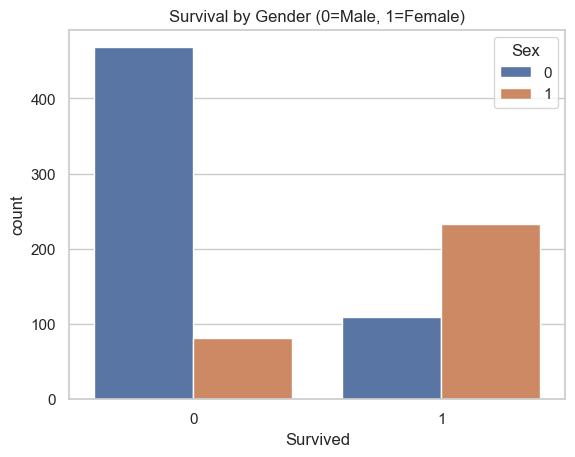

In [26]:
# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival by Gender (0=Male, 1=Female)')
plt.show()

### Insight

• Female passengers had a significantly higher survival rate than males  
• First-class passengers were more likely to survive compared to third class


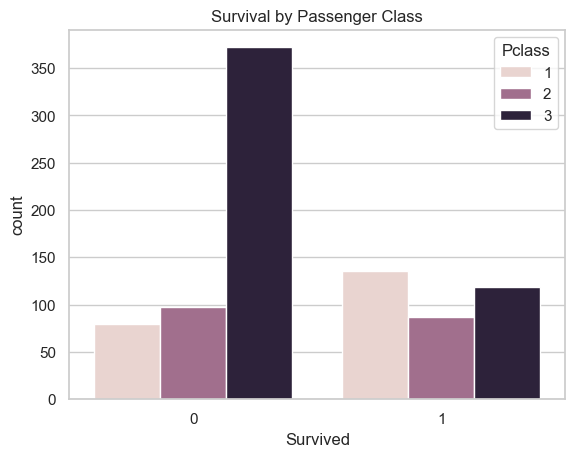

In [27]:
# Survival by Class
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

### Insight

• Female passengers had a significantly higher survival rate than males  
• First-class passengers were more likely to survive compared to third class


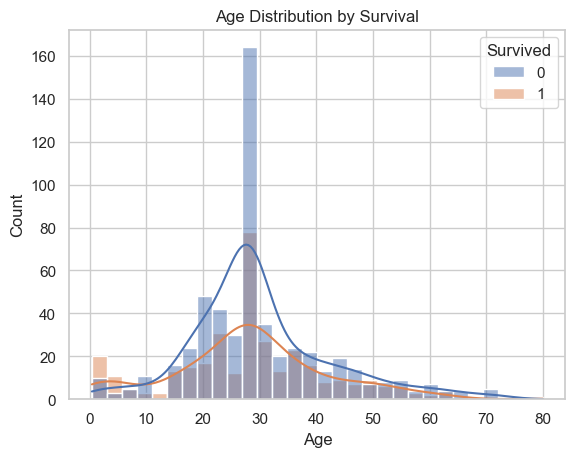

In [28]:
# Age vs Survival
sns.histplot(data=train_df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

### Insight

• Female passengers had a significantly higher survival rate than males  
• First-class passengers were more likely to survive compared to third class


In [29]:
X = train_df.drop('Survived', axis=1)  # Features
y = train_df['Survived']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 712
Testing samples: 179


## Model Evaluation

The model performance indicates that features such as gender,
passenger class, and fare are strong predictors of survival.
This model serves as a baseline and can be improved using
hyperparameter tuning or advanced algorithms.


In [30]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nDetailed Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458

Detailed Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



RandomForest was chosen as it can capture non-linear relationships
and interactions between features without extensive preprocessing.


The model achieved an accuracy of approximately 80%, indicating that features
such as passenger class, gender, and fare are strong predictors of survival.


In [31]:
# Load test file
test_df = pd.read_csv('test titanic - test vs code.csv')

# Save PassengerId for submission
passenger_ids = test_df['PassengerId']

# Same cleaning as train
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

# Predict
test_predictions = model.predict(test_df)

# Save submission
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': test_predictions
})
submission.to_csv('my_titanic_submission.csv', index=False)
print("Submission file saved as 'my_titanic_submission.csv'")

Submission file saved as 'my_titanic_submission.csv'


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15908\3306652556.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15908\3306652556.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

## Conclusion

This project demonstrates how data analysis and
machine learning techniques can be applied to
real-world datasets to extract insights.

Future improvements may include feature engineering
and testing advanced machine learning models.
